<a href="https://colab.research.google.com/github/bristiHalder/Water-Quality-Prediction-Model/blob/main/Water_quality_prediction_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df= pd.read_csv(r'/content/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


# **Exploratory Data Analysis**


In [ ]:
df.shape #rows and columns

(3276, 10)

In [ ]:
df.isnull().sum() #Calculates the sum of missing values in each column

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.info() #summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe() #descriptive statistics

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df['Sulfate'].mean()

333.7757766108135

In [ ]:
fig = px.scatter (df, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="lowess")
fig.show ()
#points are colored based on the 'Potability' column
#trendline="lowess"  draws a smooth line to show the general trend in the data.

In [ ]:
fig = px.scatter (df, x = "ph", y = "Sulfate", color = "Potability", template = "plotly_dark",  trendline="ols")
fig.show ()
#trendline="ols" draws a straight line using method Ordinary Least Squares (OLS).
#drawing the best-fitting straight line, minimizing the overall distance between the line and the points

In [ ]:
fig = px.histogram (df, x = "Sulfate",  facet_row = "Potability",  template = 'plotly_dark')
fig.show()

In [ ]:
df.fillna(df.mean(), inplace=True)
df.head()
#fills missing values with the mean value of each column
#inplace=True  ensures that the changes are applied directly to the DataFrame df, rather than returning a new DataFrame.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.nunique() # number of unique values in each column

ph                 2786
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
df.isnull().sum() #calculates the sum of missing values in each column

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.Potability.value_counts()
#counts the occurrences of unique values in the "Potability" column
#not safe to drink(0)

Potability
0    1998
1    1278
Name: count, dtype: int64

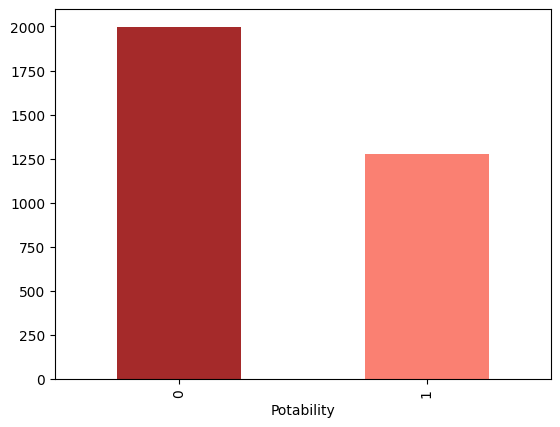

In [ ]:
df.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

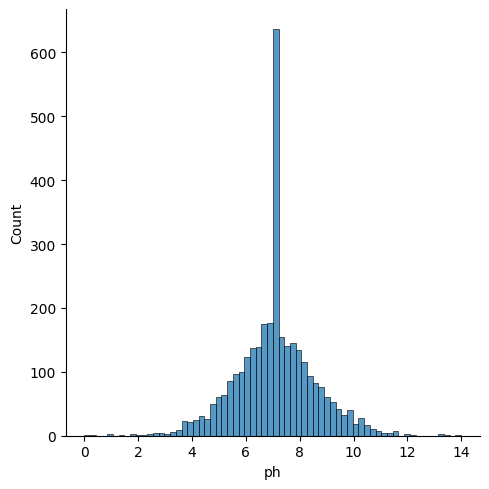

In [ ]:
sns.displot(df['ph'])
plt.show()
#creates a histogram, showing the frequency distribution of values in 'ph' column.
#understanding pH levels in the water samples

<ipython-input-23-2e6bb948fd43>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




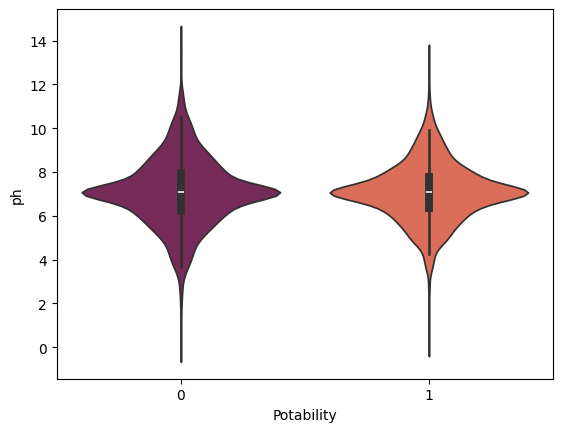

In [ ]:
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')
plt.show()
#displaying the distribution of pH levels for each category.
# separated by the 'Potability' column
#palette='rocket' parameter sets the color palette (predefined palette)

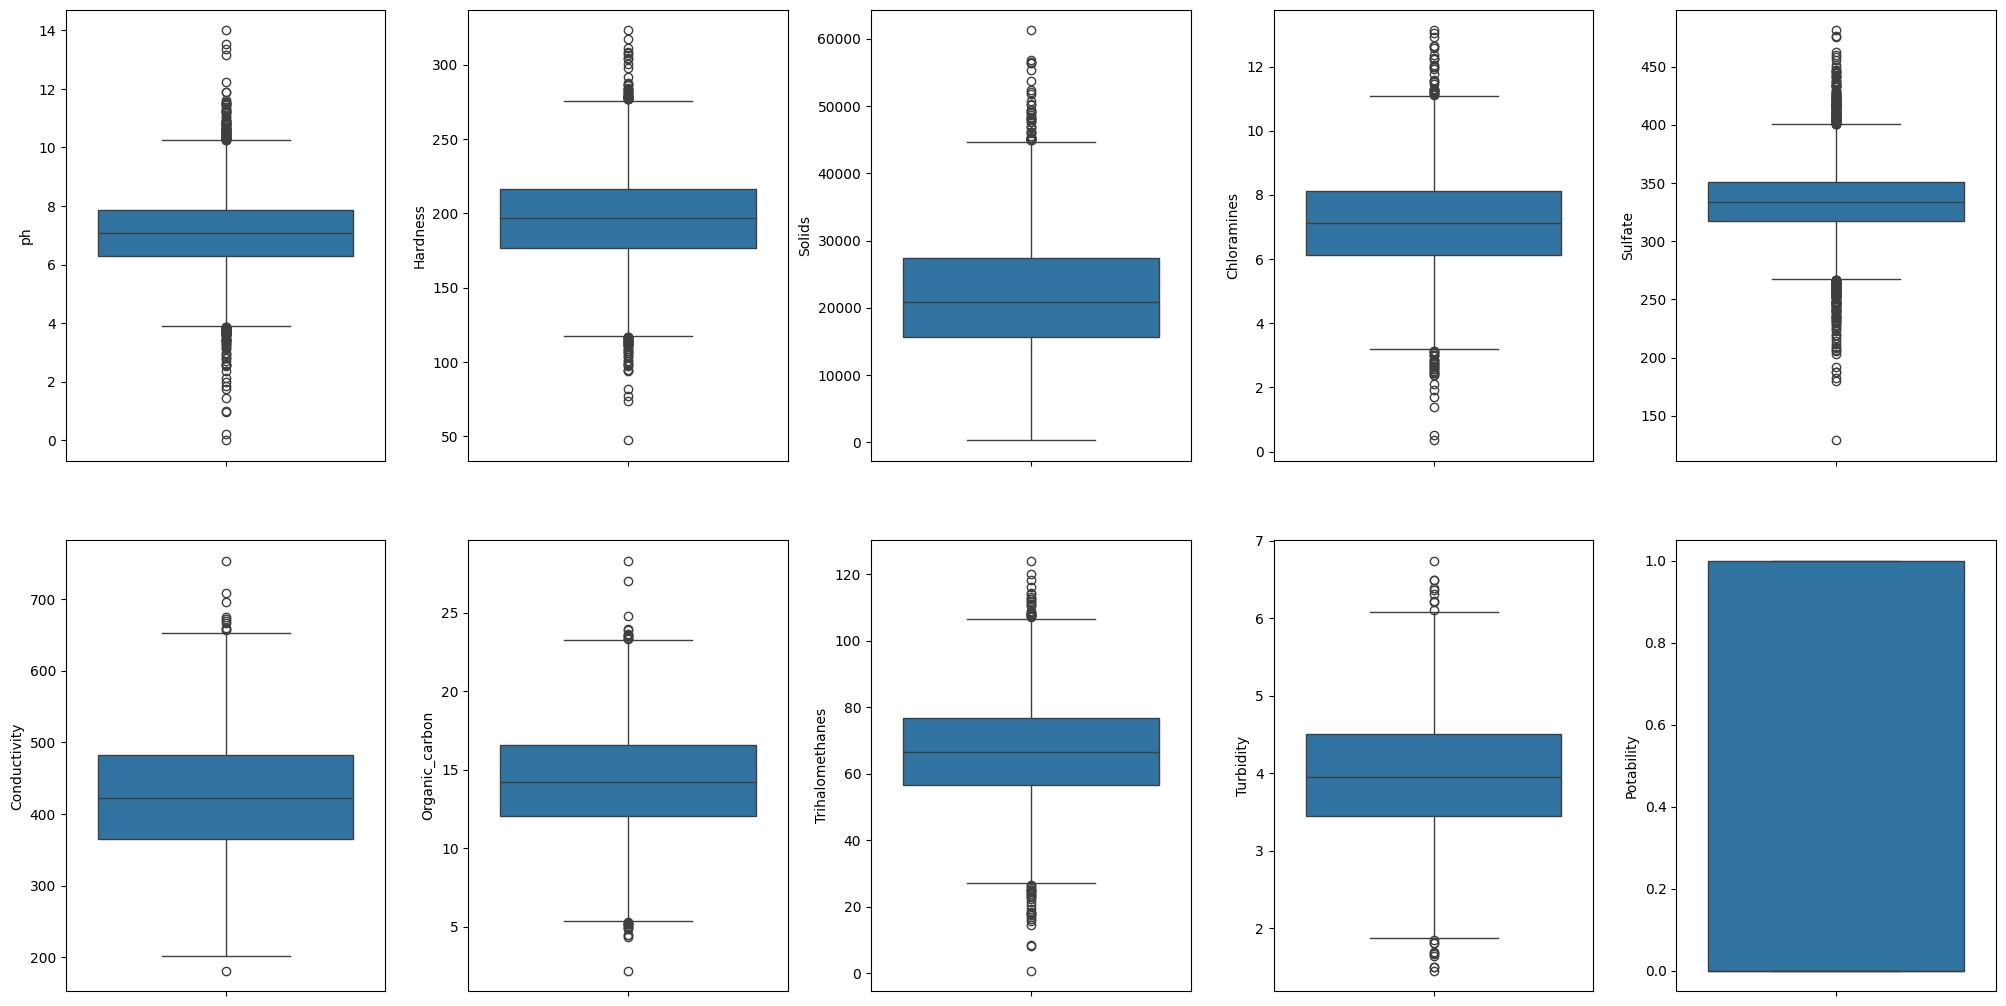

In [ ]:
# Visualizing dataset and also checking for outliers

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
#figure('fig') and subplots('ax')            specifies the size of figure in inches

index = 0
#to keep track of the current subplot index

ax = ax.flatten()
#2D array into 1D array

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    # box plot visualizes the distribution of values in the current column, including information about the median, quartiles, and presence of outliers.
    index += 1
    #move to the next subplot.

plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)
#adjusts the spacing between subplots
#'pad'control the padding between subplots.

plt.show()


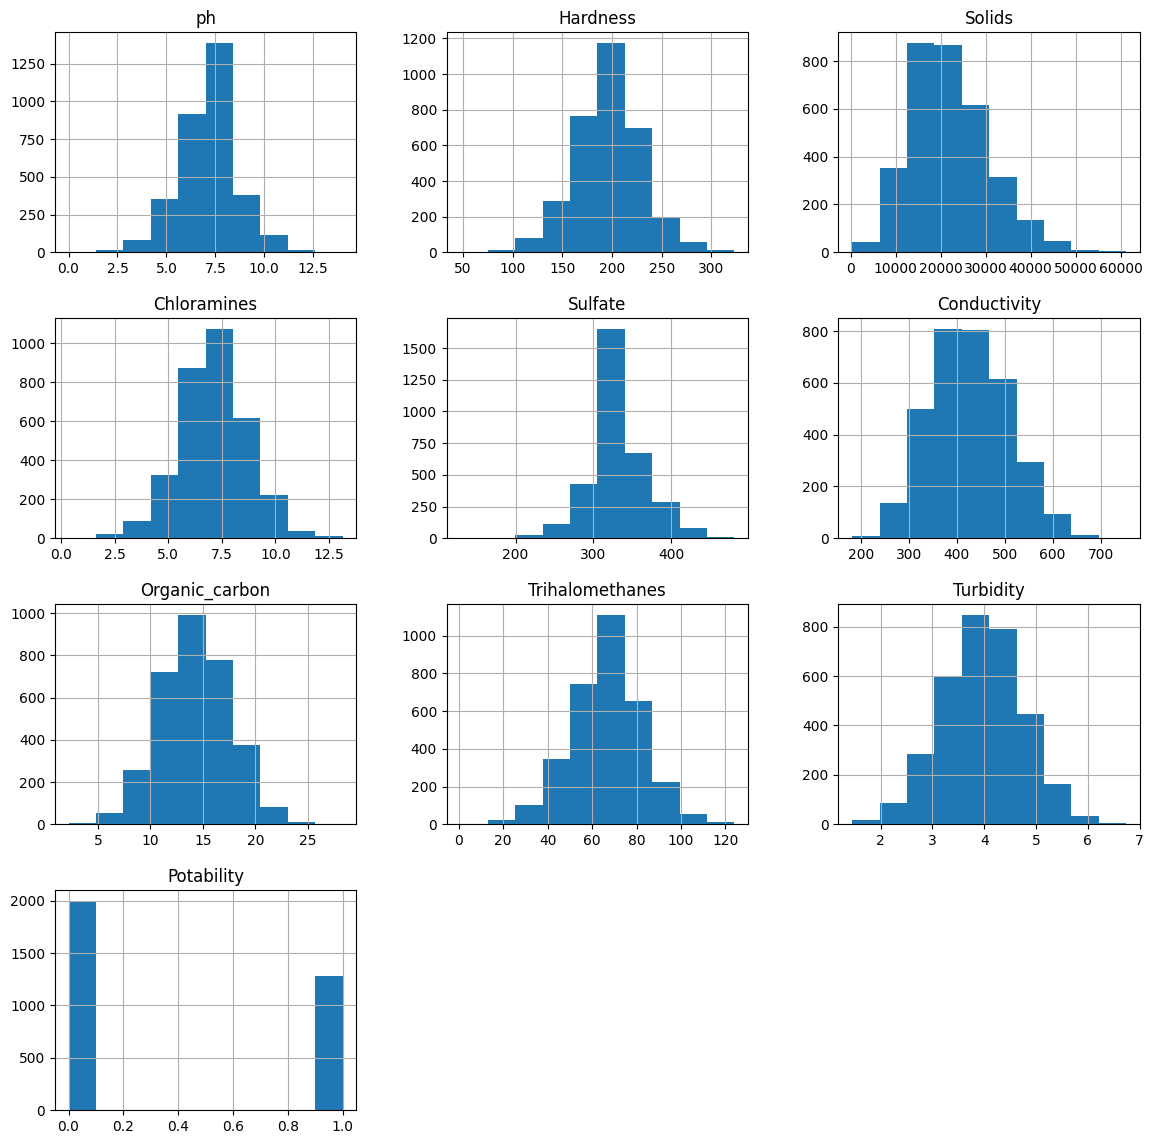

In [ ]:
df.hist(figsize=(14,14))
plt.show()
# histograms for all numerical columns

In [ ]:
sns.pairplot(df,hue='Potability')
plt.show()
#hue='Potability' colors the points based on the values in the 'Potability' column

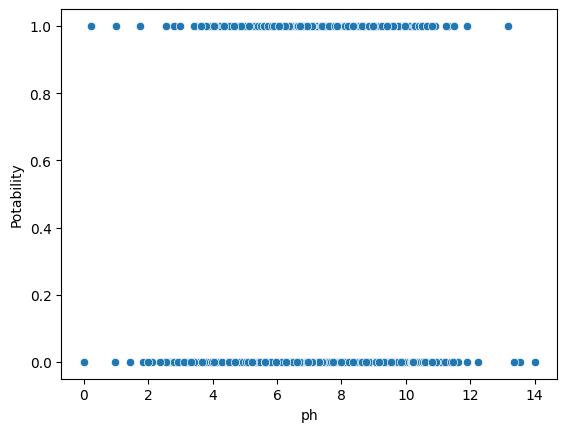

In [ ]:
sns.scatterplot(x=df['ph'],y=df['Potability'])
plt.show()
#Each point represents a water sample

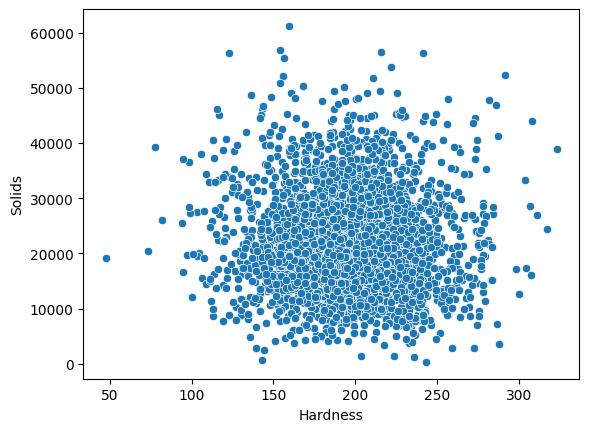

In [ ]:
sns.scatterplot(x=df['Hardness'],y=df['Solids'])
plt.show()

In [ ]:
fig = px.histogram (df, x = "Trihalomethanes",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

#understanding how trihalomethanes levels vary between the two categories of water samples.

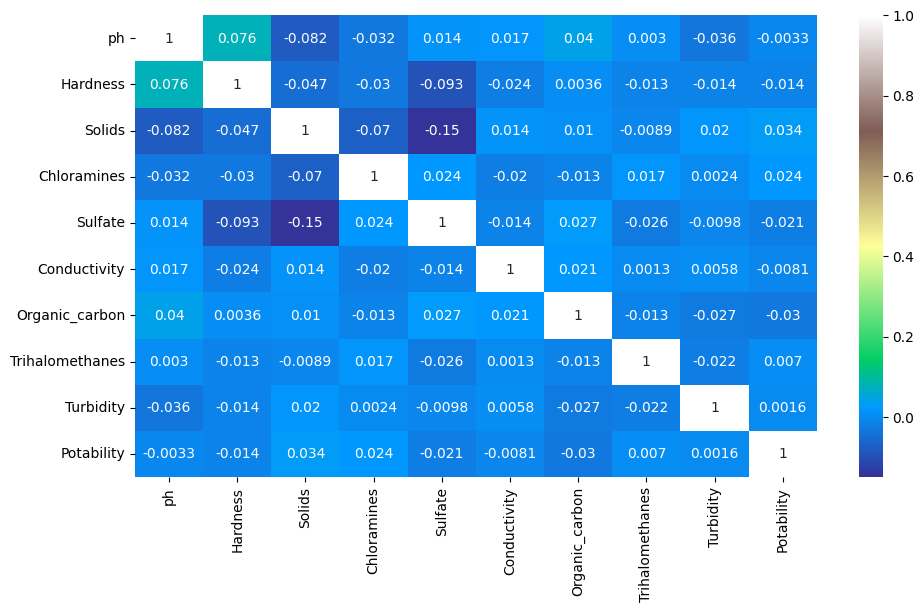

In [ ]:
# create a correlation heatmap
sns.heatmap(df.corr(),annot =True,cmap='terrain')
#annot=True adds numerical annotations to each cell of the heatmap, displaying the correlation coefficients.
#cmap sets the color map(predefined)
fig= plt.gcf()
fig.set_size_inches(11,6)
plt.show()

#warmer colors   higher positive correlation
#cooler colors   higher negative correlation
#neutral colors  low or no correlation

<Axes: >

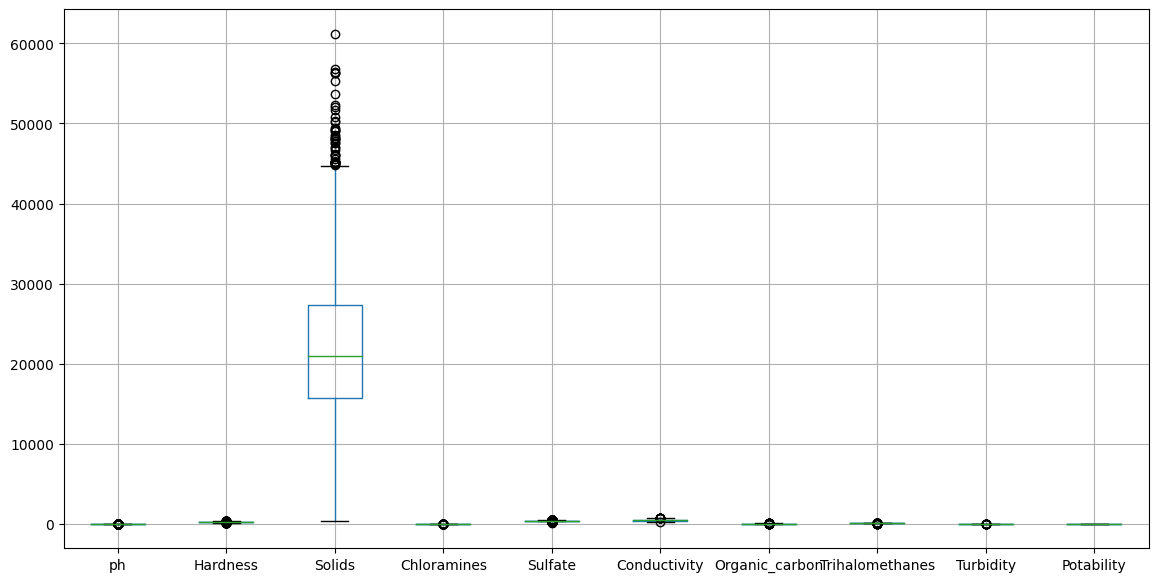

In [ ]:
df.boxplot(figsize=(14,7))

In [ ]:
df['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

# **Partitioning**

In [ ]:
X = df.drop('Potability',axis=1)
#creates a new DataFrame X containing all columns of df except the 'Potability' column.

In [ ]:
Y = df['Potability'] #containing only the 'Potability' column

In [ ]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [ ]:
Y
# store the target variable
# which is the variable I want to predict

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#33% of the data  used for testing, 67% for training

In [ ]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1556,7.080795,158.207647,45243.028953,4.064878,247.180038,399.766965,16.086232,53.502086,4.108857
1362,8.143483,182.432457,10673.582674,6.607835,333.775777,427.545219,13.719331,77.769334,2.572830
2787,5.376078,185.540478,36026.401556,9.649943,343.486633,347.565066,14.004449,66.396293,3.629250
1134,7.535700,221.792481,14829.745971,6.701159,366.412200,583.436488,17.731882,59.686076,4.208354
1509,6.618187,164.254565,13776.621792,5.925462,333.775777,315.199393,12.082169,61.474423,3.797068
...,...,...,...,...,...,...,...,...,...
1095,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
1130,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,66.396293,4.220028
1294,6.630364,186.761088,30939.023214,7.703481,333.775777,330.876083,13.815757,86.753117,3.490588
860,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [ ]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,7.080795,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891
2045,6.615350,179.240661,26392.863612,9.309160,333.775777,496.363562,12.786595,78.262369,4.453443
...,...,...,...,...,...,...,...,...,...
1662,6.006769,226.874099,20279.701038,8.166416,225.516628,275.986595,9.650786,52.640025,4.034755
445,6.728004,201.126896,22888.788065,7.663988,319.463491,325.537539,16.788306,58.961220,4.410697
617,6.284985,196.775056,29213.620386,8.528793,334.477795,574.540671,11.095893,66.396293,5.703288
1474,5.821262,204.048890,37174.005414,7.867815,329.019554,466.783264,13.988707,96.826961,4.371079


In [ ]:
Y_train.value_counts()
#frequency of each unique value in the target variable
#distribution of classes in the training data

Potability
0    1318
1     876
Name: count, dtype: int64

In [ ]:
Y_test.value_counts()
#distribution of classes in the testing data
#evaluating the performance of classification models on unseen data

Potability
0    680
1    402
Name: count, dtype: int64

# **Normalization**

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()

In [ ]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# **Model Building**

**Decision Tree**



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=9,splitter = 'best')

#criterion = 'entropy' measures the impurity of a split based on the information gain
#If the number of samples at a node is less than this value, the node will not be split further
#'best' indicates that the best split is chosen based on the criterion

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=9)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
prediction=dt.predict(X_test)
#predictions on the testing set (X_test) using the trained decision tree

accuracy_dt=accuracy_score(Y_test,prediction)*100
#calculates the accuracy of the predictions by comparing them with the actual labels (Y_test).
# convert the accuracy score to a percentage.

accuracy_dt

59.14972273567468

In [ ]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on training set: 0.940
Accuracy on test set: 0.591


In [ ]:
accuracy_score(prediction,Y_test)

#prediction= predicted labels generated by the decision tree classifier (dt) for the testing set X_test
#Y_test = are the true labels against which the predictions are compared.

# a measure of how well the classifier performs on the testing set.

0.5914972273567468

In [ ]:
print("Feature importances:\n{}".format(dt.feature_importances_))

#                                  into a string representation.

#importance of each feature in the decision tree classifier

Feature importances:
[0.11080289 0.11047415 0.10793354 0.14584766 0.12639019 0.104212
 0.10732481 0.09494843 0.09206633]


In [ ]:
confusion_matrix(prediction,Y_test)

#[TN , FP],
#[FN, TP]

array([[461, 223],
       [219, 179]])

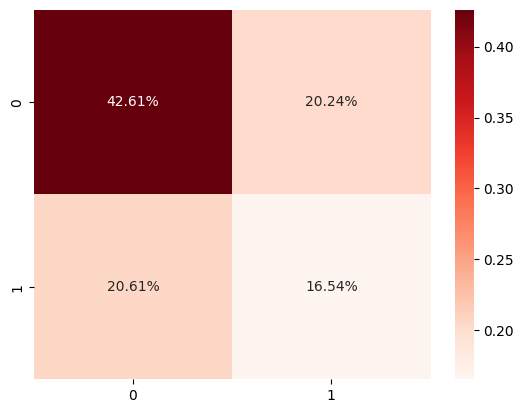

In [ ]:
cm1 = confusion_matrix(Y_test, prediction)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

**Prediction on only one set of data**

In [ ]:
X_DT=dt.predict([[8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
X_DT

array([0])

### The ground truth was drinkable 0 means non drinkable also here prediction is showing that it is not potable hence correct prediction

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 24, weights= 'uniform')
knn.fit(X_train,Y_train)

#Euclidean distance used to measure the distance between data points
# the algorithm will consider the 24 closest training examples
#uniform -> each of the k neighbors is weighted equally when making a prediction

NameError: name 'X_train' is not defined

In [ ]:
#making predictions on the test set
prediction_knn=knn.predict(X_test)

#evaluating the accuracy
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_knn)*100,'%')

NameError: name 'knn' is not defined

In [ ]:
#confusion matrix
knn_cm =confusion_matrix(Y_test, prediction_knn)

array([[467, 233],
       [213, 169]])

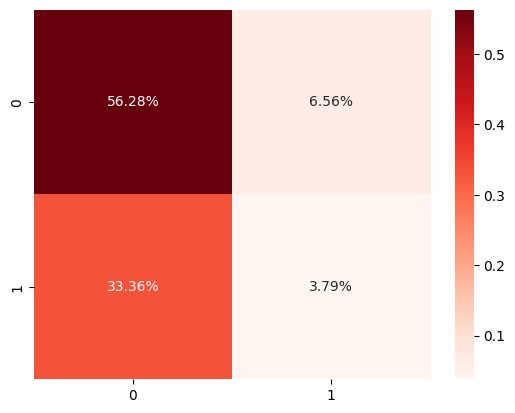

In [ ]:
sns.heatmap(knn_cm/np.sum(knn_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
#max_iter -> the maximum number of iterations for convergence
#n_jobs -> Setting it to 20 allows parallel processing to speed up the training process

In [ ]:
lg.fit(X_train, Y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
# Making predictions on the test set
prediction_lg =lg.predict(X_test)

# Evaluating the accuracy
accuracy_lg =accuracy_score(Y_test,prediction_lg)*100
print('accuracy_score      : ',accuracy_score(Y_test,prediction_lg)*100,'%')

accuracy_score      :  62.84658040665434 %


In [ ]:
print(classification_report(Y_test,prediction_lg))

#Precision: The ratio of correctly predicted positive observations to the total predicted positives
# High precision - classifier has a low false positive rate.

#Recall : The ratio of correctly predicted positive observations to all observations in the actual class
# High recall -  the classifier has a low false negative rate.

#f1-score: The average of precision and recall

#Support: The number of actual occurrences of the class

#Accuracy: The overall accuracy of the classifier.
#Macro avg: The unweighted mean of the precision, recall, and F1-score, treating all classes equally.
#Weighted avg: The weighted mean of the precision, recall, and F1-score, accounting for the support (number of true instances) of each class.

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



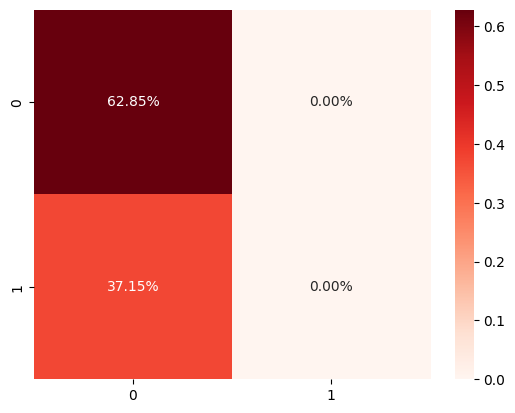

In [ ]:
# Confusion matrix
lg_cm = confusion_matrix(Y_test, prediction_lg)
sns.heatmap(lg_cm/np.sum(lg_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
#n_estimators: number of trees in the forest;
# higher number of trees generally improves the model's performance

#min_samples_leaf: minimum number of samples required to be at a leaf node ( at least 16% of the samples
#useful for smoothing the model and reducing overfitting.

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [ ]:
# Making predictions on the test set
prediction_rf=rf.predict(X_test)

# Evaluating the accuracy
accuracy_rf=accuracy_score(Y_test,prediction_rf)*100
print('accuracy_score    : ',accuracy_score(Y_test,prediction_rf)*100,'%')

accuracy_score    :  62.84658040665434 %


In [ ]:
print(classification_report(Y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



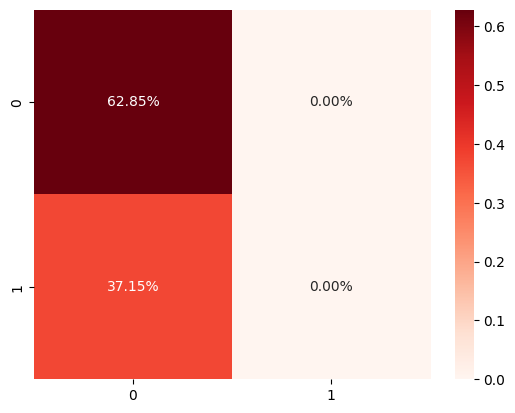

In [ ]:
# Confusion matrix
rf_cm = confusion_matrix(Y_test, prediction_rf)
sns.heatmap(rf_cm/np.sum(rf_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

##**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

#max_depth: Deeper trees can model more complex patterns but may also increase the risk of overfitting


In [ ]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=5,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# Making predictions on the test set
prediction_xgb = xgb.predict(X_test)

In [ ]:
# Evaluating the accuracy
accuracy_xgb=accuracy_score(Y_test,prediction_xgb)*100
print('accuracy_score      : ',accuracy_score(Y_test,prediction_xgb)*100,'%')

accuracy_score      :  66.54343807763401 %


In [ ]:
print(classification_report(Y_test,prediction_xgb))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       680
           1       0.60      0.29      0.39       402

    accuracy                           0.67      1082
   macro avg       0.64      0.59      0.58      1082
weighted avg       0.65      0.67      0.63      1082



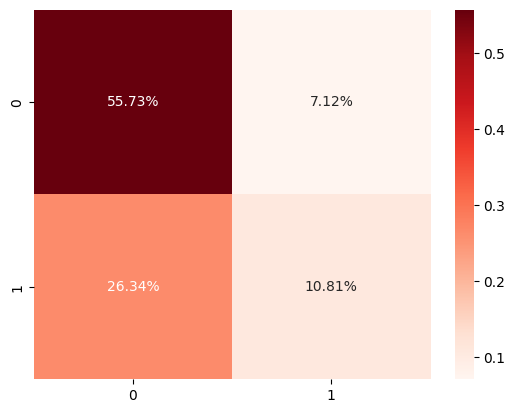

In [ ]:
#Confusion matrix
xgb_cm = confusion_matrix(Y_test, prediction_xgb)
sns.heatmap(xgb_cm/np.sum(xgb_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

##**SVM**

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
svm = SVC(kernel='rbf', random_state = 42)

#'rbf' stands for Radial Basis Function, for non-linear classification tasks.

In [ ]:
svm.fit(X_train, Y_train)

SVC(random_state=42)

In [ ]:
# Making predictions on the test set
prediction_svm = svm.predict(X_test)

In [ ]:
# Evaluating the accuracy
accuracy_svm=accuracy_score(Y_test,prediction_svm)*100
print('accuracy_score      : ',accuracy_score(Y_test,prediction_svm)*100,'%')

accuracy_score      :  62.84658040665434 %


In [ ]:
print(classification_report(Y_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



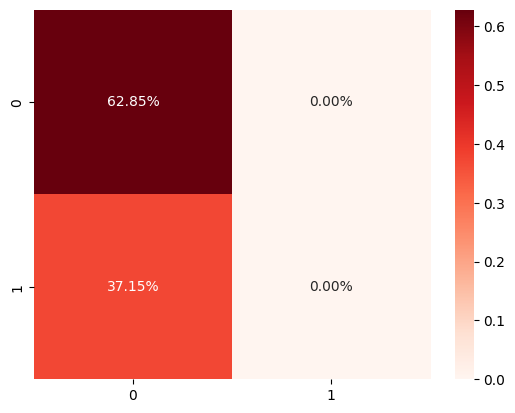

In [ ]:
#Confusion matrix
svm_cm = confusion_matrix(Y_test, prediction_svm)
sns.heatmap(svm_cm/np.sum(svm_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

##**Gaussian Naive Bayes**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
# Making predictions on the test set
prediction_gnb=gnb.predict(X_test)

# Evaluating the accuracy
accuracy_gnb=accuracy_score(Y_test,prediction_gnb)*100
print('accuracy_score      : ',accuracy_score(Y_test,prediction_gnb)*100,'%')

accuracy_score      :  63.86321626617375 %


In [ ]:
print(classification_report(Y_test,prediction_gnb))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       680
           1       0.53      0.22      0.31       402

    accuracy                           0.64      1082
   macro avg       0.60      0.55      0.53      1082
weighted avg       0.61      0.64      0.59      1082



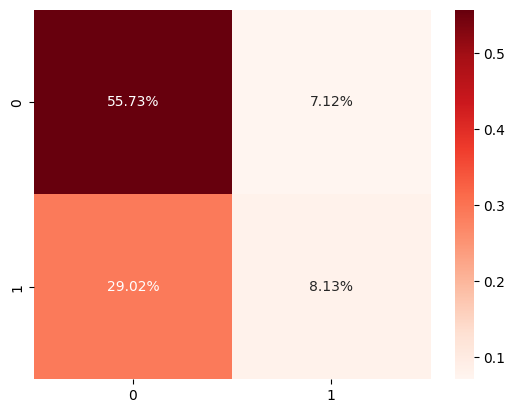

In [ ]:
#Confusion Matrix
gnb_cm = confusion_matrix(Y_test, prediction_gnb)
sns.heatmap(gnb_cm/np.sum(gnb_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

##**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)


In [ ]:
ada.fit(X_train, Y_train) #Training the Classifier

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [ ]:
# Making predictions on the test set
prediction_ada = ada.predict(X_test)

In [ ]:
# Evaluating the accuracy
accuracy_ada=accuracy_score(Y_test,prediction_ada)*100
print('accuracy_score      : ',accuracy_score(Y_test,prediction_ada)*100,'%')

accuracy_score      :  63.4011090573013 %


In [ ]:
print(classification_report(Y_test,prediction_ada))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       680
           1       0.62      0.04      0.07       402

    accuracy                           0.63      1082
   macro avg       0.62      0.51      0.42      1082
weighted avg       0.63      0.63      0.51      1082



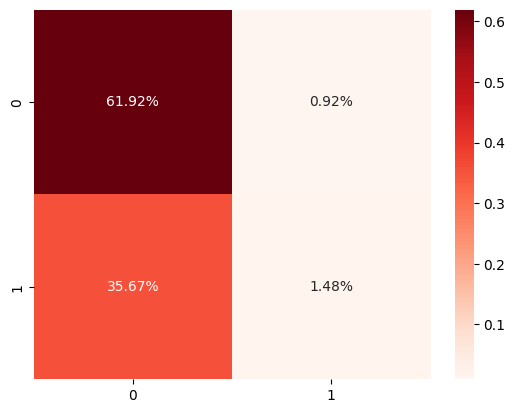

In [ ]:
#Confusion Matrix
ada_cm = confusion_matrix(Y_test, prediction_ada)
sns.heatmap(ada_cm/np.sum(ada_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

# **Before Model Optimization**

<ipython-input-102-0e2e79c8c30e>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




,Model,Accuracy_score
4,XGBoost Classifier,66.543438
5,Gaussian Naive Bayes,63.863216
7,AdaBoost,63.401109
2,Logistic Regression,62.846580
3,Random Forest,62.846580
6,SVM,62.846580
1,KNN,60.073937
0,Decision Tree,58.780037


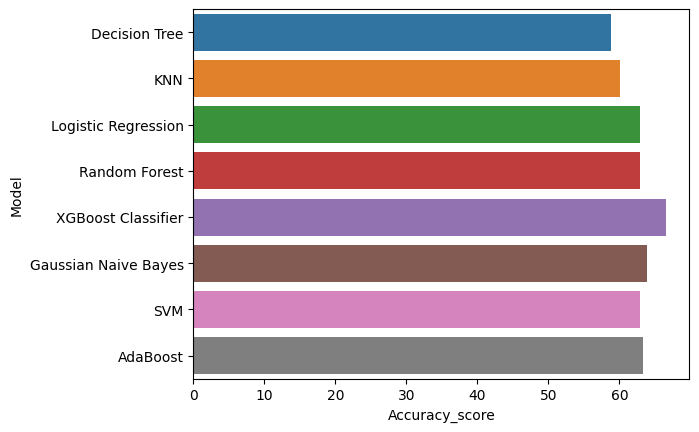

In [ ]:
models = pd.DataFrame({
    'Model':['Decision Tree', 'KNN', 'Logistic Regression', 'Random Forest','XGBoost Classifier','Gaussian Naive Bayes' ,'SVM', 'AdaBoost'],
    'Accuracy_score' :[accuracy_dt,accuracy_knn,accuracy_lg, accuracy_rf, accuracy_xgb,accuracy_gnb, accuracy_svm, accuracy_ada]
})
models

# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

#Visualizing the Accuracy Scores
sns.barplot(x='Accuracy_score', y='Model', data=models, palette=colors)

#Sorting the DataFrame based on the accuracy scores
models.sort_values(by='Accuracy_score', ascending=False)

# **Hyperparameter Tuning or Model Optimization**

### cross validation:
 1. During each iteration, 1/5th of the data is used as the test set, and the remaining 4/5th of the data is used as the training set.
 2. training set (X_train) itself is further split into training and testing subsets during each iteration  
  
Hence it's a good approach


In [ ]:
dt.get_params().keys()
#This is useful for understanding which hyperparameters can be set or tuned.

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#GridSearchCV is a tool for hyperparameter tuning.
#RepeatedStratifiedKFold is a cross-validation technique

In [106]:
#Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()
#This classifier will be used as the base model for hyperparameter tuning.

#Define the Hyperparameter Grid
criterion = ["gini", "entropy"] # to measure the quality of a split. "gini" (Gini impurity) and "entropy" (information gain).
splitter = ["best", "random"] # used to choose the split at each node. "best" (choose the best split) and "random" (choose the best random split).
min_samples_split = range(1,10) # minimum number of samples required to split an internal node. This is set to a range from 1 to 9.

#The parameters dictionary combines these hyperparameters into a format that GridSearchCV can use.
parameters = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)

#Define the Cross-Validation Strategy
cv = RepeatedStratifiedKFold(n_splits=5, random_state=101)
#split the data into 5 folds, ensuring that each fold maintains the same proportion of class labels

#Set Up the Grid Search
grid_search_dt = GridSearchCV(estimator=dt, param_grid=parameters, cv=cv,scoring='accuracy')

#estimator=dt:           The decision tree classifier that you want to tune.
#param_grid=parameters:  The dictionary of hyperparameters to search over.
#cv=cv:                  The cross-validation strategy defined earlier.
#scoring='accuracy':     The metric used to evaluate the performance of the models.

In [107]:
# Fit the grid search to the data
grid_search_dt.fit(X_train,Y_train)

# runs the grid search on the training data, testing all combinations of hyperparameters defined in parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [108]:
print(grid_search_dt.best_params_)
print(f"Best cross-validation accuracy: {grid_search_dt.best_score_}")

{'criterion': 'entropy', 'min_samples_split': 7, 'splitter': 'random'}
Best cross-validation accuracy: 0.5804478838372806


In [109]:
# Evaluate the best model on the test set
best_model_dt = grid_search_dt.best_estimator_
Y_pred = best_model_dt.predict(X_test)
test_accuracy_dt = accuracy_score(Y_test, Y_pred)
print(f"Test set accuracy: {test_accuracy_dt}")

Test set accuracy: 0.5822550831792976


In [110]:
dt = DecisionTreeClassifier(criterion= 'gini', min_samples_split= 7, splitter= 'random')

In [111]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=7, splitter='random')

In [112]:
#Make Predictions
Y_pred = dt.predict(X_test)

In [113]:
#Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix

In [114]:
# Accuracy
accuracy_dt=accuracy_score(Y_test,Y_pred)*100
accuracy_dt

58.04066543438078

## This accuracy is better then before hence using the grid search we have found the best parameters and applied them to attain best possible acurracy using Decision Tree

In [118]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

#score method returns the mean accuracy on the given data and labels.

Accuracy on training set: 0.888
Accuracy on test set: 0.580


significant difference suggests that the model is overfitting the training data.

Further hyperparameter tuning, might help in achieving a better balance between the training and test accuracies.

In [119]:
accuracy_score(Y_pred,Y_test)

0.5804066543438078

In [115]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[466 214]
 [240 162]]


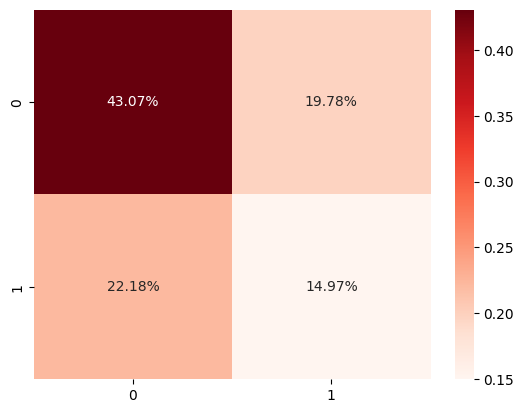

In [116]:
# Visualize the confusion matrix as a heatmap
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm / np.sum(cm), annot=True, fmt='0.2%', cmap='Reds')
plt.show()

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [122]:
#Create the KNN Model:
model = KNeighborsClassifier()

#Define the Hyperparameter Grid
n_neighbors = range(1, 31) # Number of neighbors
weights = ['uniform', 'distance'] # Weight function used in prediction (uniform or distance).
metric = ['euclidean', 'manhattan', 'minkowski'] #Distance metric to use

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [123]:
#Set Up Cross-Validation Strategy:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

#Initialize Grid Search
grid_search_knn = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,scoring='accuracy',error_score=0)
#scoring='accuracy': Optimizes for accuracy.
#n_jobs=-1: Uses all available processors for parallel computation
#error_score=0: Sets the score to 0 for models that raise an error.

#Fit the Grid Search to the Training Data:
grid_search_knn.fit(X_train, Y_train)

#Print the Best Score and Parameters:
print(f"Best: {grid_search_knn.best_score_:.3f} using {grid_search_knn.best_params_}")


Best: 0.588 using {'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'uniform'}


In [124]:
# Print all mean scores, standard deviations, and parameters
means = grid_search_knn.cv_results_['mean_test_score']
stds = grid_search_knn.cv_results_['std_test_score']
params = grid_search_knn.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

0.536 (0.033) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.536 (0.033) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.580 (0.016) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.536 (0.033) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.548 (0.019) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.545 (0.017) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.584 (0.021) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.553 (0.025) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.561 (0.021) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.563 (0.016) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.584 (0.023) with: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.563 (0.019) with: {'metric': 'euclidean', 'n_neighbors': 6, 'weights'

In [125]:
grid_search_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'uniform'}

### These are the best parameters found using grid search

In [126]:
# Make predictions on the test set using the best KNN model
knn_y_predicted = grid_search_knn.predict(X_test)
knn_y_predicted

array([1, 0, 0, ..., 0, 1, 0])

In [127]:
# Calculate accuracy of the predictions
knn_grid_score= accuracy_score(Y_test, knn_y_predicted)
print("Accuracy score using best KNN model:", knn_grid_score)

Accuracy score using best KNN model: 0.6118299445471349


## This accuracy is better then before as earlier it was 60.073937 hence using the grid search we have found the best parameters and applied them to attain best possible acurracy using Decision Tree

In [ ]:
confusion_matrix(Y_test, knn_y_predicted)

array([[616,  64],
       [356,  46]])

### In rest of the models only the best parameters were used hence no need to do model optimization for them

# **After Model Optimization**

In [132]:
models1 = pd.DataFrame({
    'Model':['Decision Tree', 'KNN', 'Logistic Regression', 'Random Forest','XGBoost Classifier','Gaussian Naive Bayes' ,'SVM', 'AdaBoost'],
    'Accuracy_score' :[accuracy_dt,accuracy_knn,accuracy_lg, accuracy_rf, accuracy_xgb,accuracy_gnb, accuracy_svm, accuracy_ada]
})
models1


,Model,Accuracy_score
0,Decision Tree,58.040665
1,KNN,60.073937
2,Logistic Regression,62.846580
3,Random Forest,62.846580
4,XGBoost Classifier,66.543438
5,Gaussian Naive Bayes,63.863216
6,SVM,62.846580
7,AdaBoost,63.401109


<ipython-input-133-8e3214dd602d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Accuracy Score of Different Models')

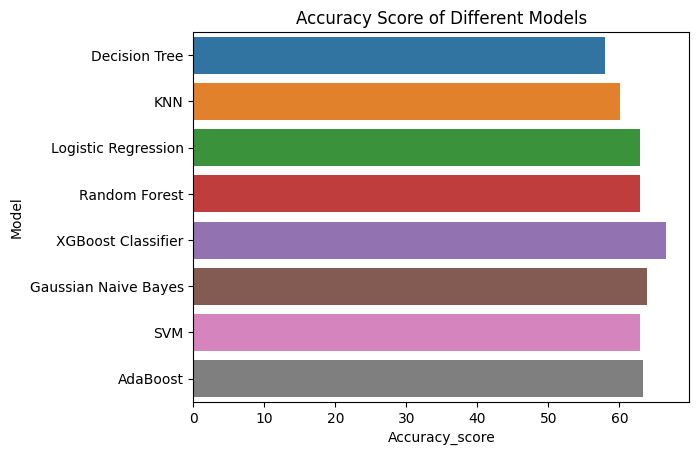

In [133]:

# Define a color palette for the bar plot
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

sns.barplot(x='Accuracy_score', y='Model', data=models1, palette=colors)

models1.sort_values(by='Accuracy_score', ascending=False)
plt.title('Accuracy Score of Different Models')

## **Conclusion:** Hence **XGBoost Classifier** gives the best accuracy